Note: Throughout this notebook, you are **not obliged to** fill any function. Provided function headers or codes aim to help you to find a way to the solution. You are free to delete them if that helps.

# Question: Linear Regression

Suppose we are given the following model 
$$
y_i \approx m x_i + \sum_{k=1}^K a_k \sin(\omega_k x_i) + \sum_{i=1}^K b_k \cos(\omega_k x_i)
$$

Show that this problem can be reduced to a least squares problem of form
$$
y \approx A(\omega, K) \theta
$$
where the design matrix $A(\omega, K)$ is determined solely by the frquency parameters $\omega$ and the remaining parameters can be organized as a vector $\theta = (m, a_{1:K}, b_{1:K})$. 


In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import pandas as pd


## Write a program that generates data from the above model

<IPython.core.display.Javascript object>


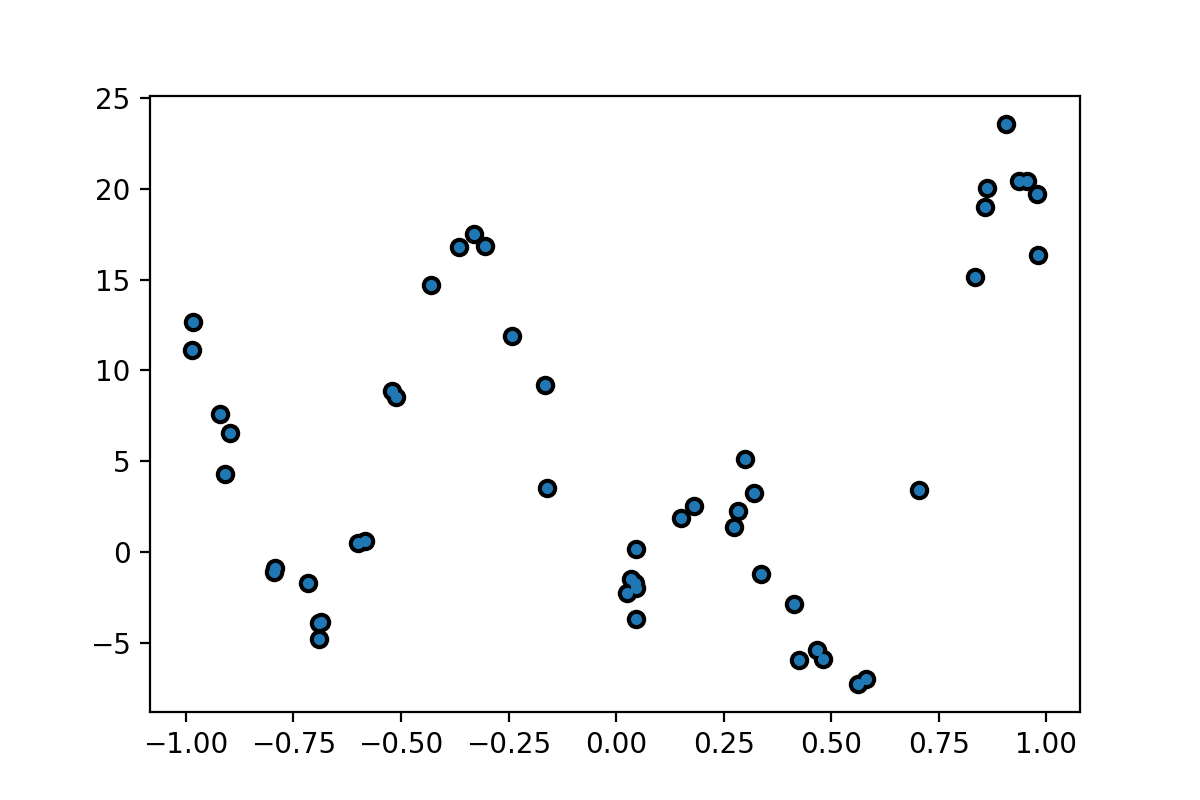

In [18]:
# This data is generated for K=4,N=50,m=0.2. It is distorted with a noise as well. You may try to obtain a similar plot or
# generate a different one.

## For a given set of frequency parameters $\omega$ solve the problem using least squares

In this experiment, we will assume that we know the frequency parameters $\omega$ (hence also the dimension $K$). Write a program to find the least squares solution of $\theta$.

<IPython.core.display.Javascript object>


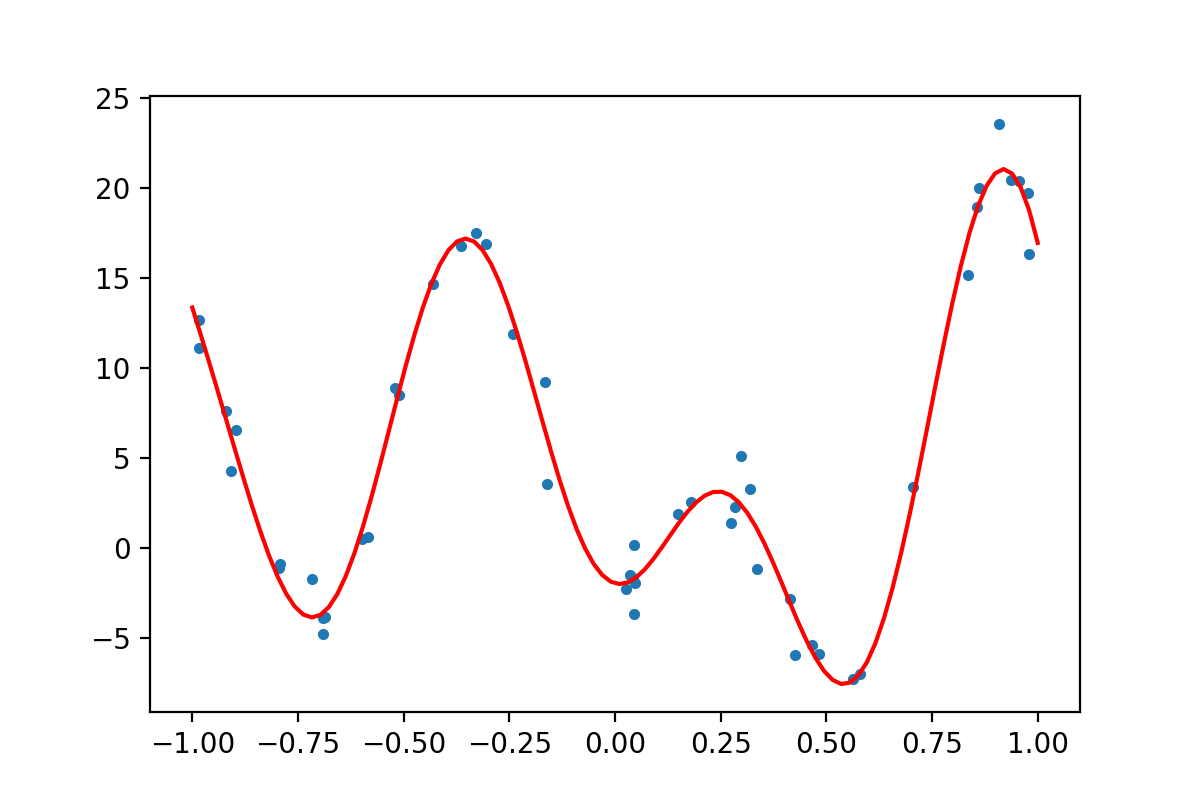

In [20]:
#%matplotlib inline
# Setup the vandermonde matrix
N = len(x)

def make_design_matrix(x, om):
    # Fill this method
    pass

A = make_design_matrix(x.reshape(N,1), om_true)


## Evaluate and visualize the error as a function of $\omega$ only

This error can be fully visualized for $K=1$ and $K=2$.

Note that for any given $\omega$ we could run the least squares algorithm to find the best $m, \alpha, \beta$ parameters. We will denote the optimal parameters as $\theta^*(\omega) = (m, a, b)^*$. We will exhaustively evaluate the error for all $\omega$ by computing $E(\omega, \theta^*(\omega))$.

<IPython.core.display.Javascript object>


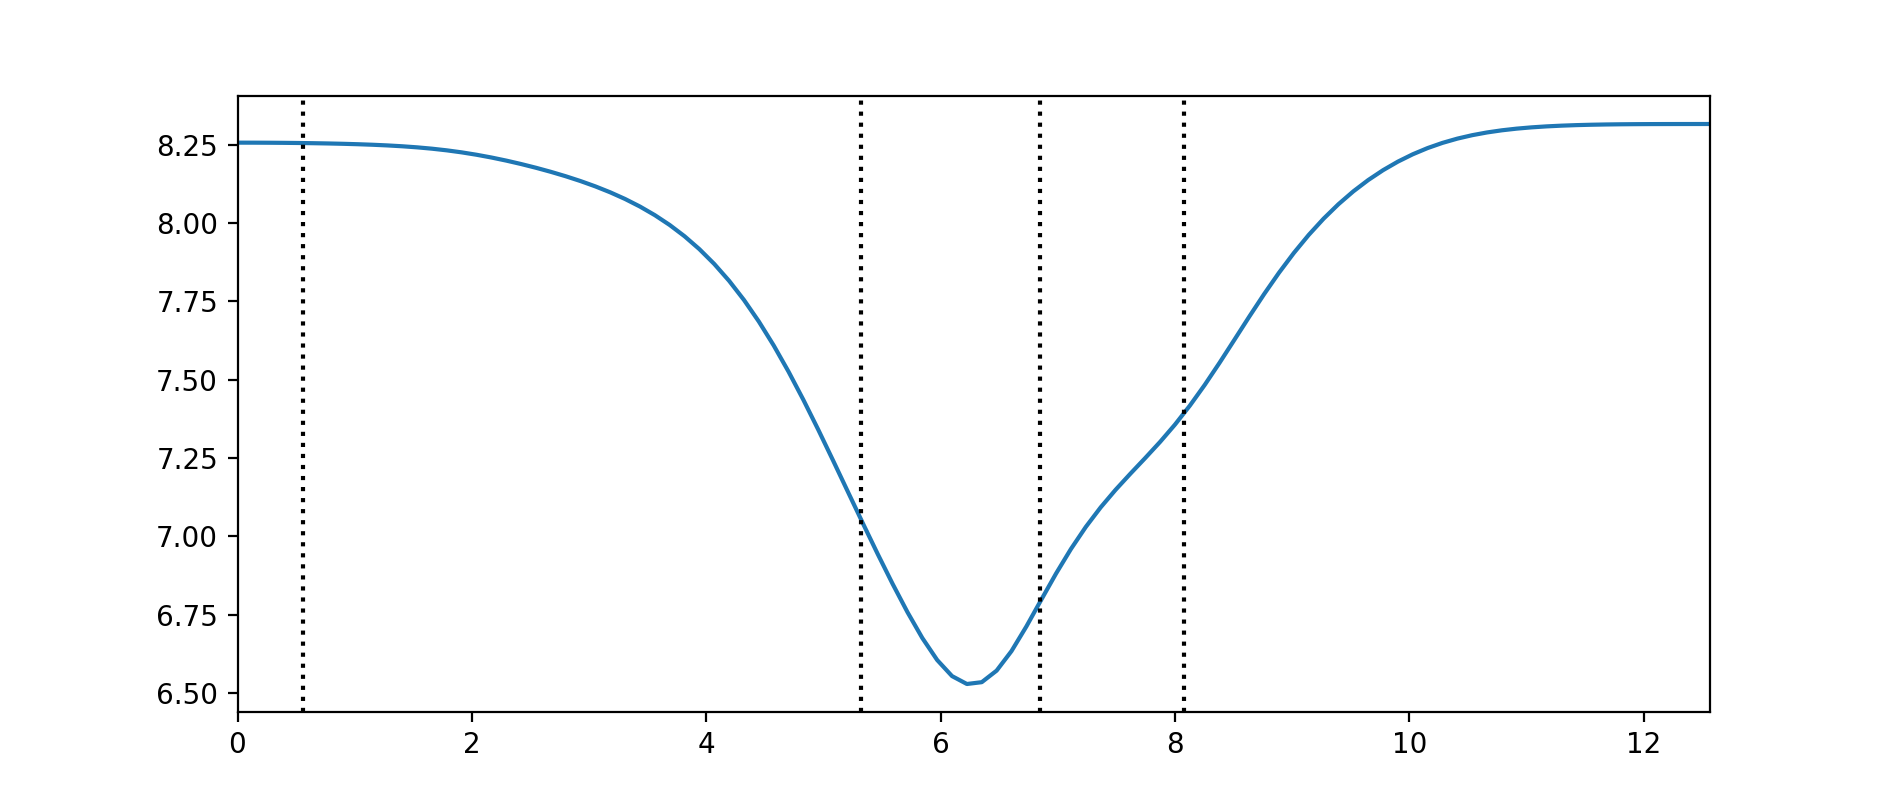

In [17]:
#%matplotlib inline
# Generate different omegas and compute error for each of them.
OM = np.linspace(0.01,MAX_OM,100)
EE = []


<IPython.core.display.Javascript object>


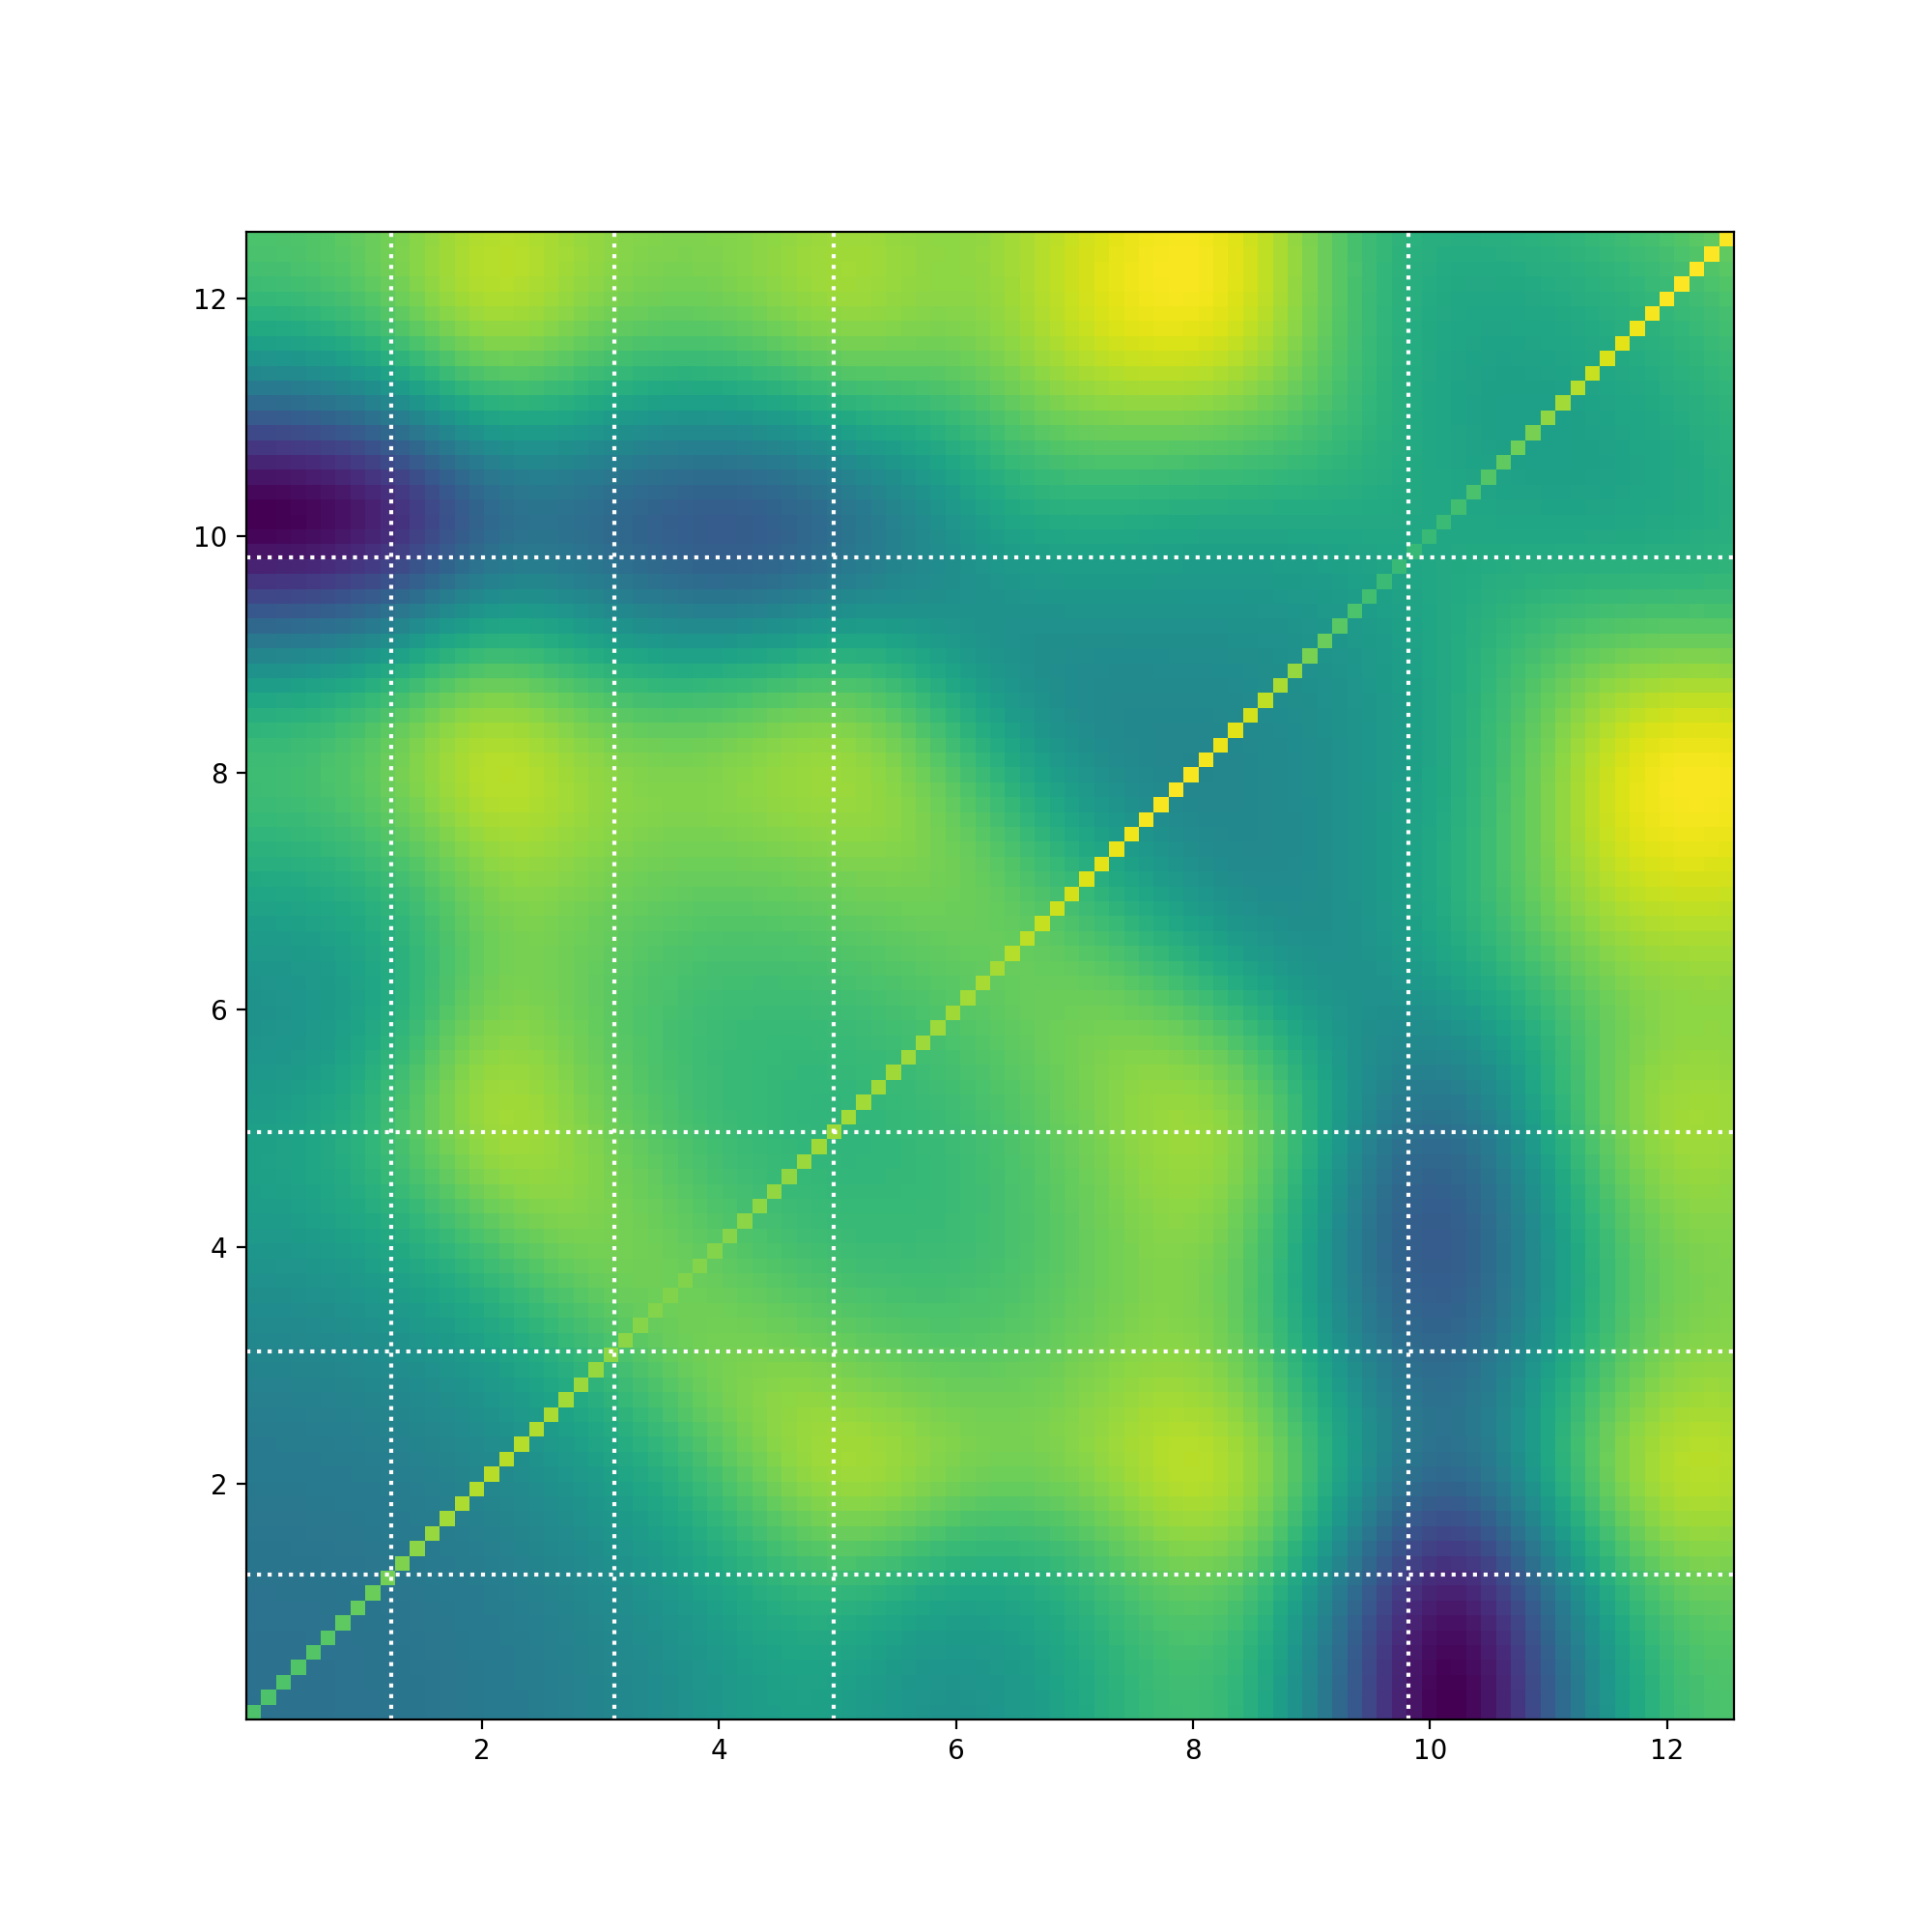

In [21]:
#%matplotlib inline

OM = np.linspace(0.01,MAX_OM,100)
EE = np.zeros((len(OM),len(OM)))
for i,omega1 in enumerate(OM):
    for j,omega2 in enumerate(OM):
        # Compute the errors for different omega combinations. Do not forget to consider rank defficient design matrix case.


# These lines are for plotting purposes
l = min(OM)
r = max(OM)
plt.figure(figsize=(10,10))
plt.imshow(np.log(EE), extent=(l,r,l,r), interpolation='nearest', origin='lower')
for o in om_true:
    plt.axvline(o, color='w',ls=':')
    plt.axhline(o, color='w',ls=':')
    
plt.show()

# Question: Stochastic Gradient Descent

For the sinusoidal model, develop a SGD method for estimating $\omega$ as well as the other parameters.

## Derive and implement the expression of the gradient

$$
E_i(m,a,b,\omega) = \frac{1}{2}\left(y_i - \left(m x_i + \sum_{k=1}^K a_k \sin(\omega_k x_i) + \sum_{k=1}^K b_k \cos(\omega_k x_i)\right)\right)^2
$$

$$
e_i = y_i - \left(m x_i + \sum_{k=1}^K a_k \sin(\omega_k x_i) + \sum_{k=1}^K b_k \cos(\omega_k x_i)\right)
$$

\begin{eqnarray}
\nabla E_i = \left(\begin{array}{c} \frac{\partial E_i}{\partial m} \\ \frac{\partial E_i}{\partial a_1} \\
\vdots \\ \frac{\partial E_i}{\partial a_K} \\  \frac{\partial E_i}{\partial b_1} \\
\vdots \\ \frac{\partial E_i}{\partial b_K} \\  \frac{\partial E_i}{\partial \omega_1} \\
\vdots \\ \frac{\partial E_i}{\partial \omega_K} 
\end{array}
\right) = 
-e_i \left(\begin{array}{c} x_i \\ \sin(\omega_1 x_i) \\ \vdots \\ \sin(\omega_K x_i) \\ 
\cos(\omega_1 x_i) \\ \vdots \\ \cos(\omega_K x_i) \\ a_1 \cos(\omega_k x_i) x_i - b_1 \sin(\omega_1 x_i) x_i \\
\vdots \\ a_K \cos(\omega_K x_i) x_i - b_K \sin(\omega_K x_i) x_i\end{array}
\right)
\end{eqnarray}

In [7]:
# You can fill this function to genrerate the actual model.
def model_fun(x, theta, omega):
    pass

# You can fill this funtion to compute gradients of the parameters
def grad_fun(y, x, theta, omega):
    pass

## Implement SGD

Implement SGD and test it on synthetic data generated in Question 1. 
Show the evolution of the error as a function of iterations.


<IPython.core.display.Javascript object>


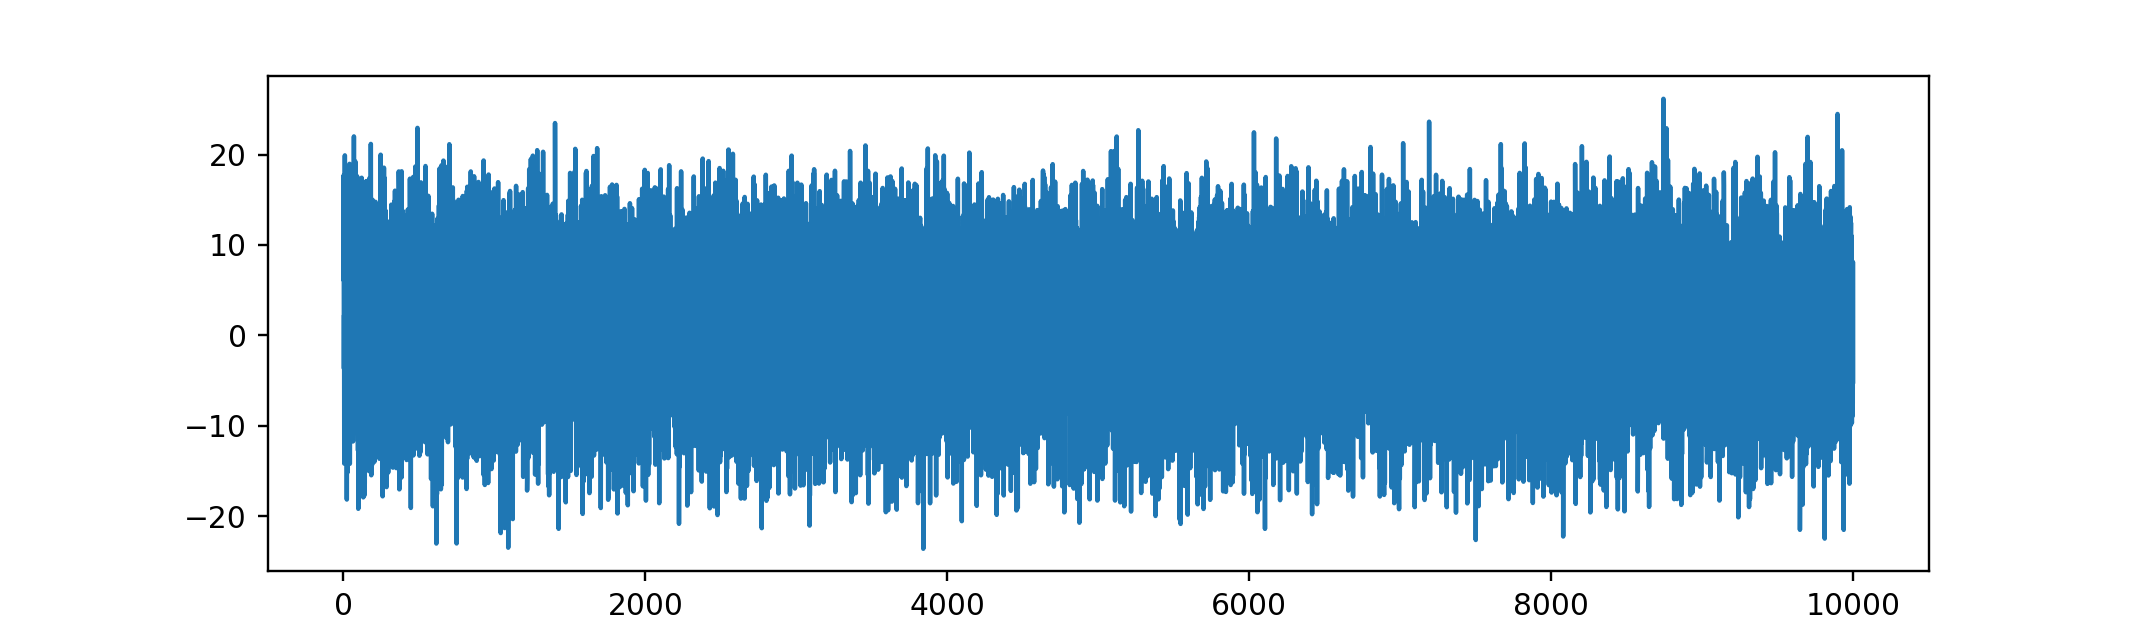

In [29]:
#%matplotlib inline
K_try = 2
# Initialize
ep = 0.1
om = np.random.rand(K_try)*4*np.pi
th = np.random.randn(len(om)*2+1)

ERR = []
OM_PATH = []

MAX_EPOCH = 10000
for epoch in range(MAX_EPOCH):
    # Implement SGD here
    
# PLot the error as a function of iteratation
plt.figure(figsize=(10,3))
plt.plot(ERR)
plt.show()

## Plot the true function and the fit

<IPython.core.display.Javascript object>


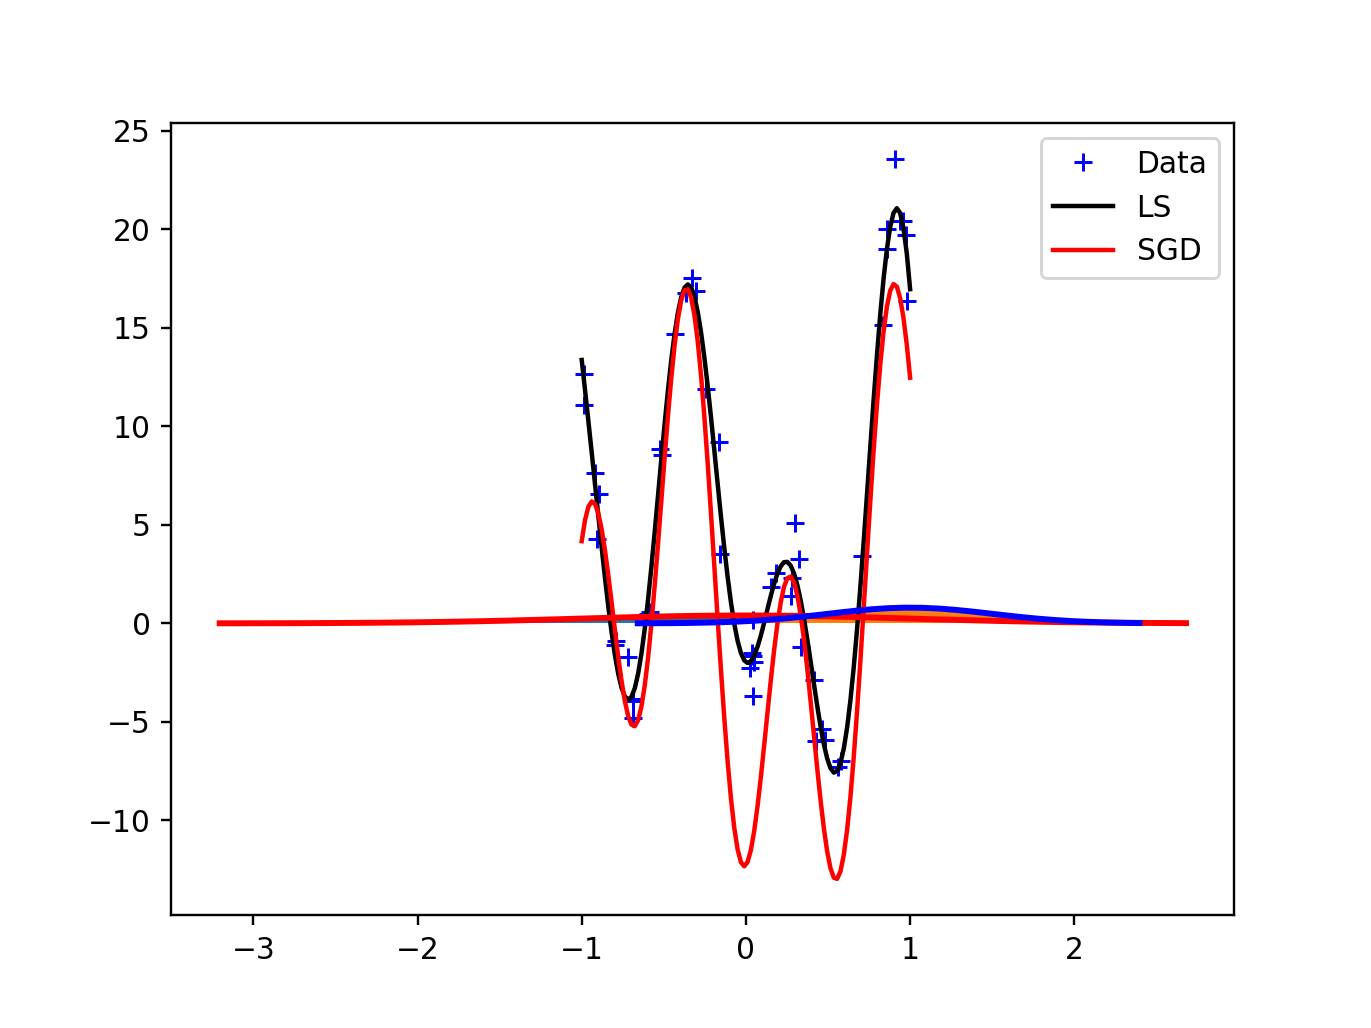

In [26]:
#%matplotlib inline
# Plot data, LS and SGD at once 

## Plot the error surface and plot the path taken by SGD

<IPython.core.display.Javascript object>


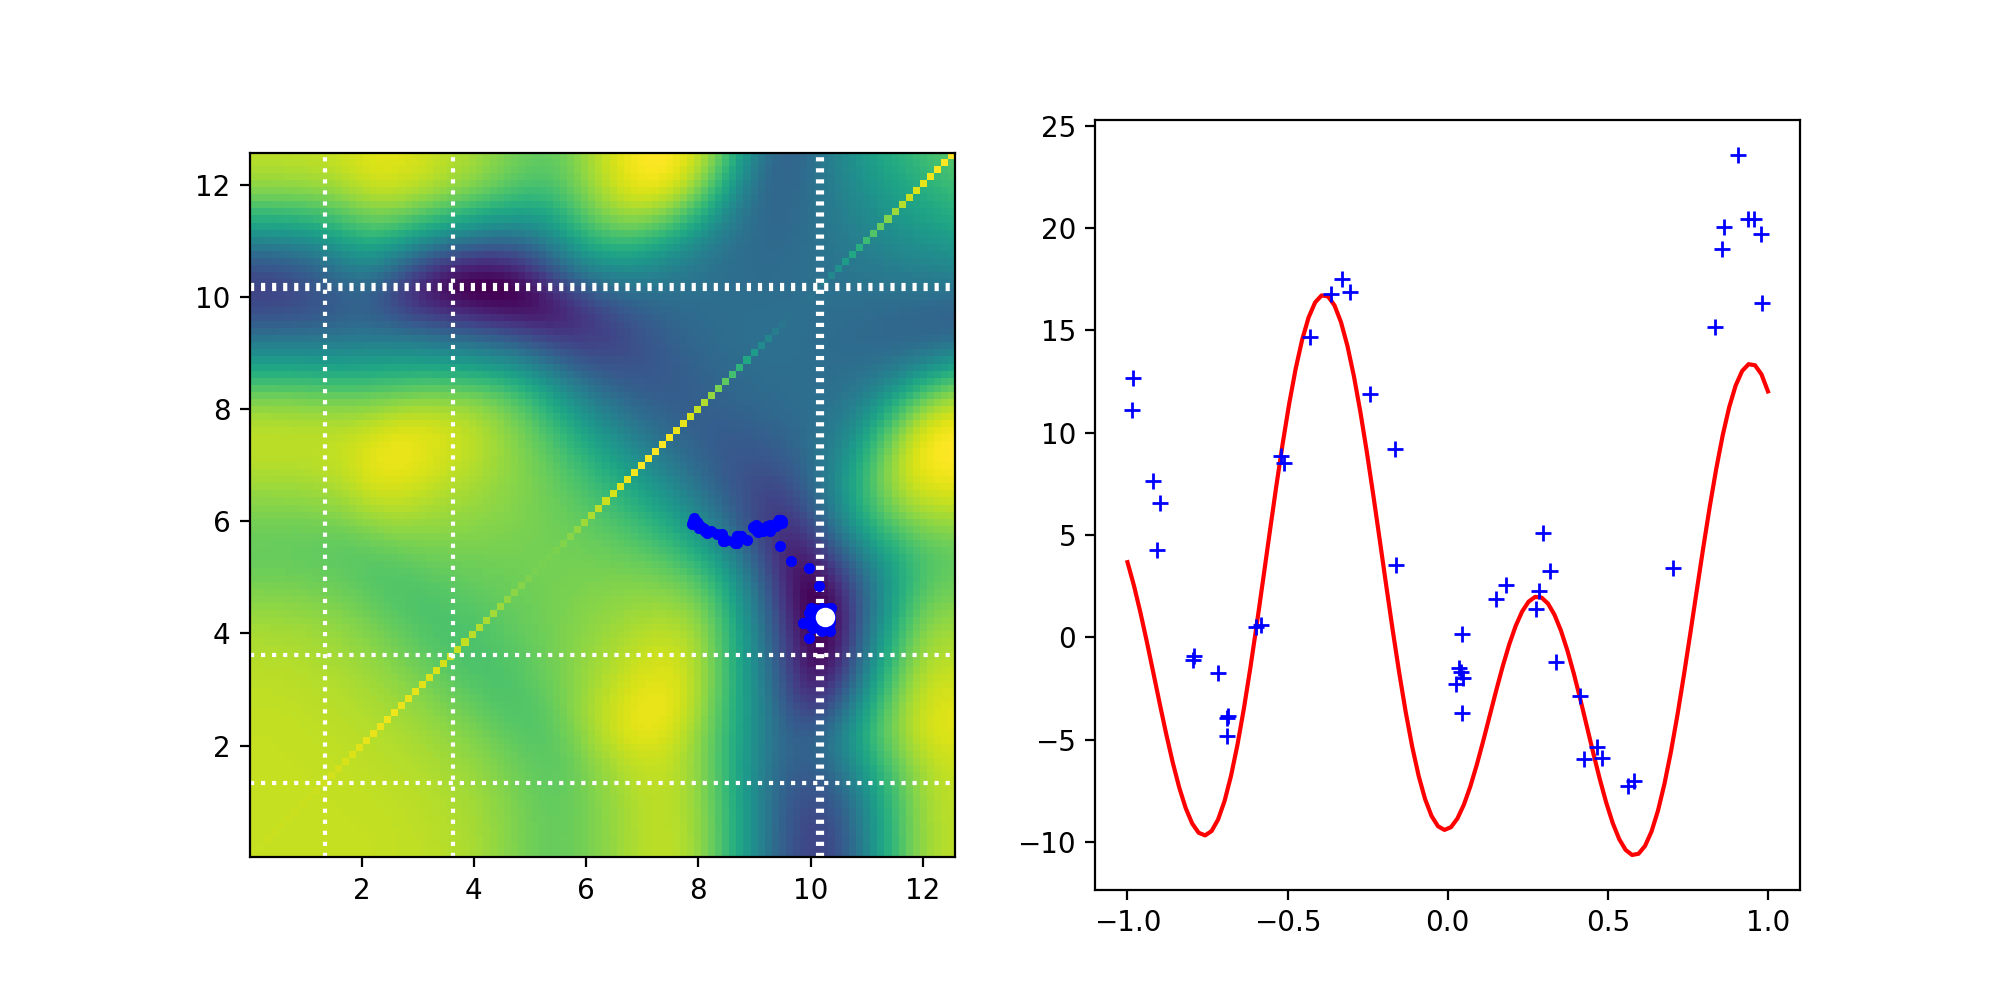

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import pandas as pd

from sklearn.datasets import load_iris

# Question 3: Decision Trees

In this exercise we will investigate and compare two alternative measures for choosing a 
decision boundary and a feature in decision trees: (a) Gini impurity and (b) Information Gain. 

Suppose there are $C$ classes in a dataset with $N$ samples. The number of examples having class $c$ is
$N_c$ where $\sum_c N_c = N$. 

At each step, a decision tree algorithm tries multiple potential thresholds (remember that as the basic decision tree algorithm looks at a single feature at a time
we only need to consider midpoints) and selects the one that would lead to the "purest" partitions. We will measure 
the impurity by Entropy or the Gini impurity.


A given threshold $\tau$ subdivides the dataset into two partitions of sizes $L$ and $R$
according to a single feature $x$: $L$ data points with $x< \tau$ and $R$ data points with $x \geq \tau$ where $L + R = N$. The number of data points of class $c$ in each partition is $L_c$ and $R_c$. We have $L_1 + L_2 + \dots + L_C = L$ and $R_1 + R_2 + \dots + R_C = R$.

The Gini impurity is defined as:
$$G(p_{1:C}) = 1 - \Sigma_c p_c^2$$
where $p_i$ is the frequency of each class

The entropy, on the other hand is defined as 
$$H(p_{1:C}) =  - \Sigma_c p_c \log{p_c}$$
Note that $\log$ stands for the natural logarithm.

Compute the following indices

### Gini:
$$
U_G(\tau) = \frac{L}{N} G(L_{1:C}/L) + \frac{R}{N} G(R_{1:C}/R)
$$
### Entropy:
$$
U_H(\tau) = \frac{L}{N} H(L_{1:C}/L) + \frac{R}{N} H(R_{1:C}/R)
$$

### Information gain:
$$
I(\tau) = H(N_{1:C}/N) - U_H(\tau)
$$


Given a dataset write a program that plots the scatterplot any two features and computes each index.


In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import pandas as pd
from sklearn.datasets import load_iris

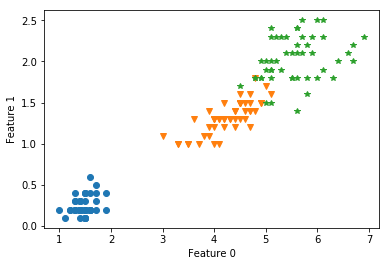

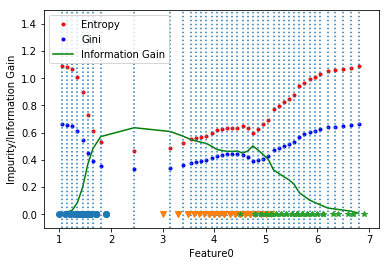

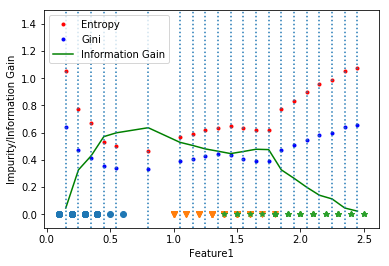

In [5]:

dataset = load_iris()
X, c = dataset['data'][:,2:], dataset['target']
M, N = X.shape


# Question 4: ROC curve and the AUC score

Suppose you are given two probability distributions, each denoting a class conditional density of a feature.

Sample from the distributions and estimate the ROC curve and the AUC (area under the curve) score.

The densities should be 

1. Gaussians with mean $\mu_0$ and variance $V_0$ $\mathcal{N}(\mu_0, V_0)$ and $\mu_1$ and variance $V_1$
1. Symmetric triangular distribution on the inteval $(a_0, b_0)$ and $(a_1, b_1)$

Note that your code should work for any variance and mean value. 
Here are example plots for $\mathcal{N}(0,0.1)$ and $\mathcal{N}(1,0.5)$

![](img/normal.png)
![](img/ROC.png)

<IPython.core.display.Javascript object>


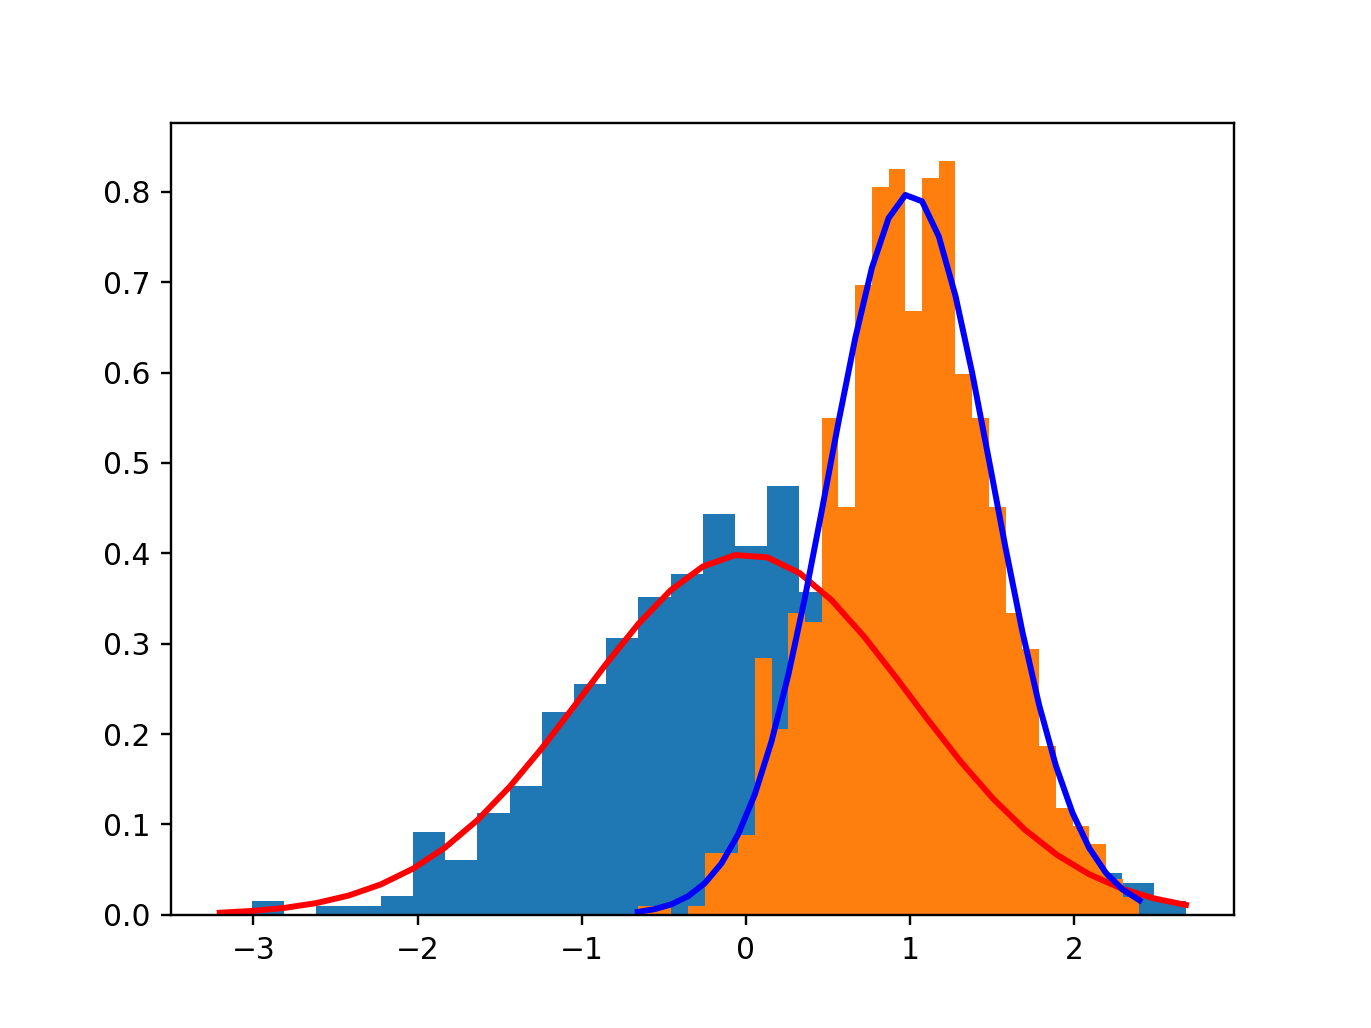

<IPython.core.display.Javascript object>


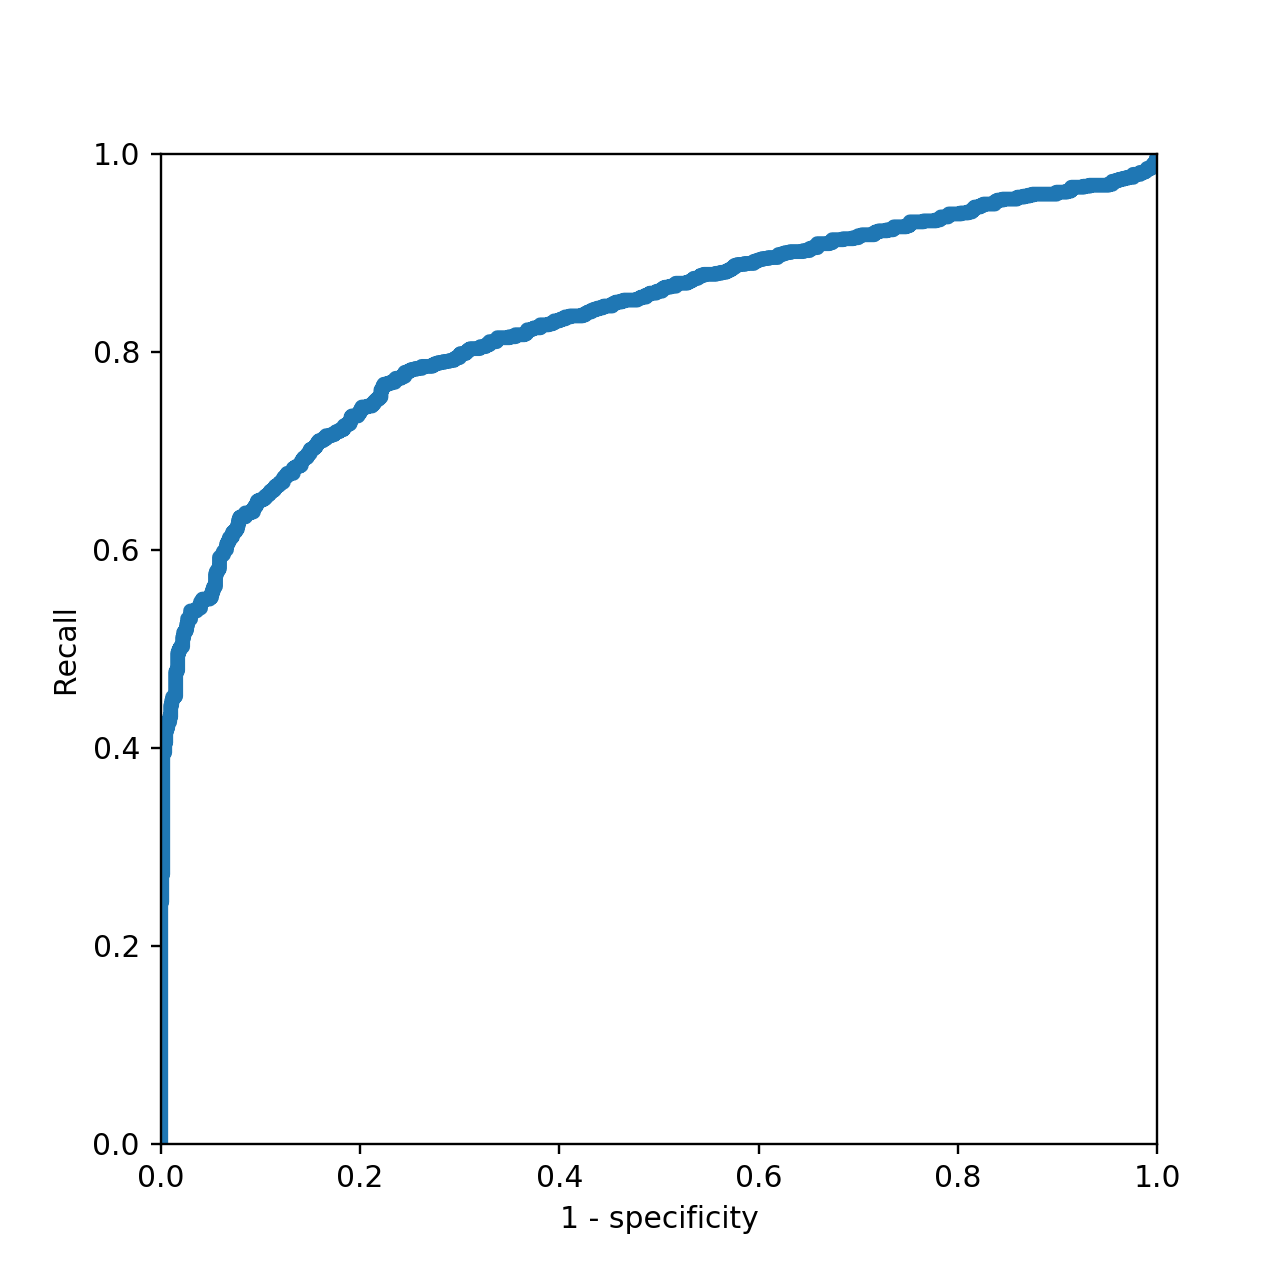